In [25]:
from astropy.io import fits
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.cosmology import Planck18
import astropy.units as u


# Specify the path to your FITS file
fits_file_path = '../Data/QSO_cat_fuji_healpix_for_lyalpha.fits'

# Open the FITS file
with fits.open(fits_file_path) as hdul:
    # Assuming the table is in the first HDU (Header Data Unit)
    data = hdul[1].data

# Convert the FITS table to a Pandas DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
#print(df)

h=Planck18.H0/100


In [26]:
## Redshift Cuts
z_up=2.1
z_lo=0.8

df=df[(df['Z']>z_lo) & (df['Z']<z_up)]

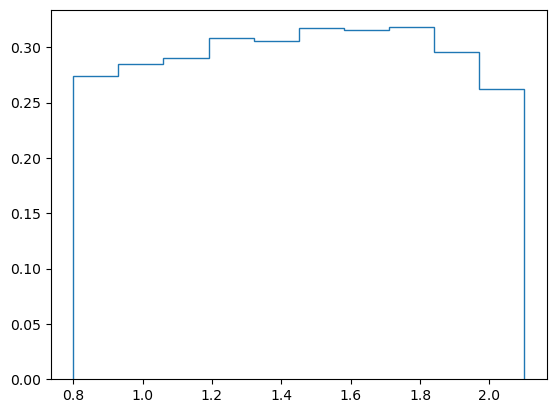

In [27]:
counts, bins = np.histogram(df['Z'])     # Calcuates Histogram

d=Planck18.comoving_distance(np.linspace(0.8,2.1,len(bins)))     # Calculates Comoving distance at redshift bins

vol=(1700/360/360)/3*(d**3)             # Calculate comoving volume in bin
vol=vol[1:]-vol[:-1]                    # Calculate
vol/=(h**3)


plt.stairs(counts/vol*1e4, bins)